## Assignment 2: Adversarial Patch

Kelly Tong

Link to Google Colab Notebook: https://colab.research.google.com/drive/1gzrStjI2DyZvfOhJ94llfOeGEeS5uVDu#scrollTo=vFN6sZz_R0S6

In [32]:
## Navigate to the Github Repository
!git clone https://github.com/Kelly0604/AIPI590_Assignment2.git
%cd /content/AIPI590_Assignment2
%ls

Cloning into 'AIPI590_Assignment2'...
remote: Enumerating objects: 15, done.
remote: Counting objects: 100% (15/15), done.
remote: Compressing objects: 100% (14/14), done.
remote: Total 15 (delta 3), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (15/15), 77.95 KiB | 1.37 MiB/s, done.
Resolving deltas: 100% (3/3), done.
/content/AIPI590_Assignment2
 apple.jpg    custard_apple.jpg   merged_image.jpg   README.md
 banana.jpg   grape.jpg          'merge image.pdf'


## Adversarial Patch Description
In this assignment, I choose to use "merging two images" as my adversarial change. The two images I chose are "custard apple.jpg" and "banana.jpg". This decision is made due to the similarity as well as distinct features of the two images. Both a custard apple and a banana are from the fruit category, but their appearance and colors are quite distinct.

The two images are merged with an 0.7 alpha blend, creating a disbalance between the two images. The features of banana become more apparent than that of the custard apple. By adjusting the size of the apple apple image to the same size as the custard apple image, the banana features and characteristics are stretched. The adversarial changes and output image for testing are all demonstrated below.

In [33]:
## Import Necessary packages
from PIL import Image
from IPython.display import display
from google.colab import files

In [37]:
def merge_images(image_path1, image_path2, output_path, alpha=0.5):
    """
    Merges two images with a specified alpha blending factor.

    Parameters:
    - image_path1: str, path to the first image (background)
    - image_path2: str, path to the second image (overlay)
    - output_path: str, path to save the merged image
    - alpha: float, blending factor (0.0 to 1.0),
             where 0 is fully the first image and 1 is fully the second image

    Returns:
    - Merged image object
    """
    # Load the two images
    image1 = Image.open(image_path1)
    image2 = Image.open(image_path2)

    # Resize the second image to match the first image's size
    image2 = image2.resize(image1.size)

    # Blend the images
    merged_image = Image.blend(image1, image2, alpha=alpha)

    # Save the output image
    merged_image.save(output_path)

    # Return the merged image
    return merged_image

# Paths to the uploaded files
image_path1 = '/content/AIPI590_Assignment2/custard_apple.jpg'
image_path2 = '/content/AIPI590_Assignment2/banana.jpg'
output_path = '/content/AIPI590_Assignment2/merged_image.jpg'

# Merge the images with a 0.7 alpha blend
merged_image = merge_images(image_path1, image_path2, output_path, alpha=0.7)

# Display the output image
merged_image.show()

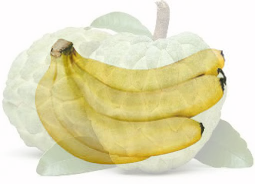

In [38]:
# Display the image directly in the notebook
display(merged_image)

In [39]:
# Save the output image
merged_image.save('/content/merged_image.jpg')
files.download('/content/merged_image.jpg')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Results Analysis

The custard apple and banana images are merged to get the merge image, which is then tested with a Torchvision ResNet34 model. The top 5 classification results as classified by the model is displayed in the chart below.

Before Adversarial Attack (merge) : Custard apple and Banana

After Adversarial Attack (merge) : Top classification becomes bassinet

The model has incorrectly classify the object and has been deceived by the adversarial changes. However, if we look at the second most likely object classified, the model is still able to recognize some of the banana features in the images. On the other hand, the custard apple features are not recognized by the model as shown by the top 5 classification results.

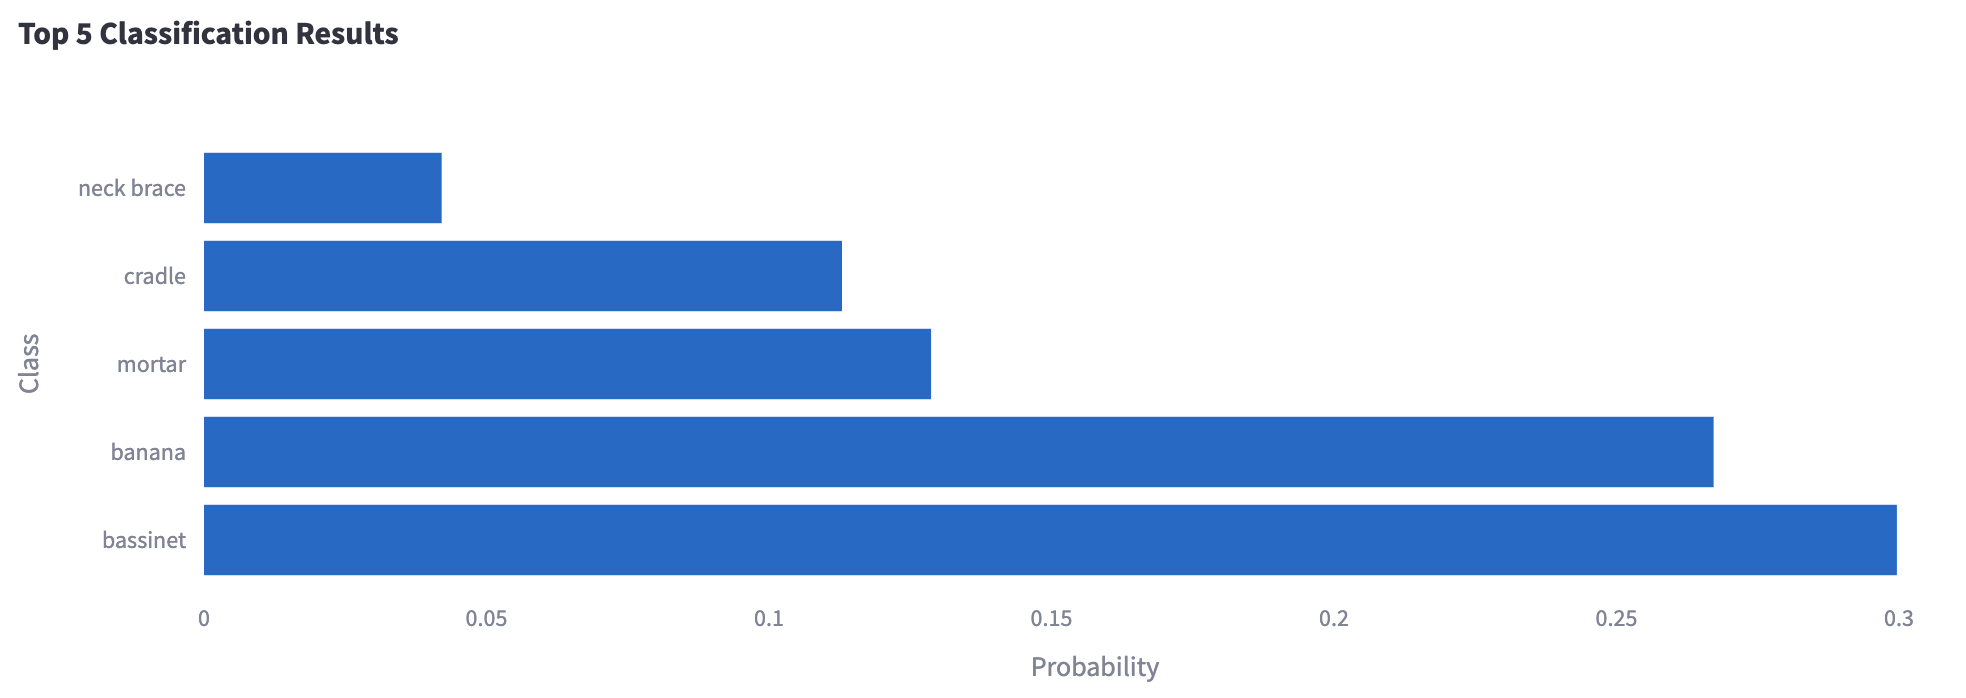